In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
plt.style.use('tableau-colorblind10')

In [2]:
species_df = pd.read_csv("clean_species.csv")
species_df.head()

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN


In [3]:
species_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119248 entries, 0 to 119247
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Species ID           119248 non-null  object
 1   Park Name            119248 non-null  object
 2   Category             119248 non-null  object
 3   Order                117776 non-null  object
 4   Family               117736 non-null  object
 5   Scientific Name      119248 non-null  object
 6   Common Names         92094 non-null   object
 7   Record Status        119248 non-null  object
 8   Occurrence           99106 non-null   object
 9   Nativeness           94197 non-null   object
 10  Abundance            76302 non-null   object
 11  Seasonality          20124 non-null   object
 12  Conservation Status  4709 non-null    object
dtypes: object(13)
memory usage: 11.8+ MB


In [4]:
species_df.isnull().sum()

Species ID                  0
Park Name                   0
Category                    0
Order                    1472
Family                   1512
Scientific Name             0
Common Names            27154
Record Status               0
Occurrence              20142
Nativeness              25051
Abundance               42946
Seasonality             99124
Conservation Status    114539
dtype: int64

Interesting to check the total amount of null rows in each row. The individual species identificators like the Species ID and the Scientific  Name, are all correctly assigned with no null values. However we can see that the family, order and common names have some null values. This could mean the dataset is incomplete, however most probably is just some fauna/flora that is rare enough to not be given a common name and that weren't assigned a Order and Family yet. The values in the columns after Record Status its probably because there's not enough data to know that information.

I decided to get a list of some of the null values in the Order column to check some of them out:

In [5]:
null_values_list = species_df["Order"].isnull()
null_values = species_df.loc[null_values_list, "Order"]
random_null_values = (null_values.sample(n=5))
random_null_indexes = random_null_values.index

In [6]:
species_df.iloc[random_null_indexes]

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status
21335,CRLA-3274,Crater Lake National Park,Spider/Scorpion,NaN,NaN,Algophagopsis,NaN,In Review,NaN,NaN,NaN,NaN,NaN
92640,REDW-6000,Redwood National Park,Fungi,NaN,NaN,Pleutotus dryinus,NaN,In Review,NaN,NaN,NaN,NaN,NaN
92601,REDW-5961,Redwood National Park,Fungi,NaN,NaN,Naucoria cetunculus,NaN,In Review,NaN,NaN,NaN,NaN,NaN
49084,GRSM-4535,Great Smoky Mountains National Park,Insect,NaN,NaN,Incisalia irus,NaN,In Review,Present,NaN,NaN,NaN,NaN
18697,CONG-2954,Congaree National Park,Invertebrate,NaN,NaN,Ptylodactyla,NaN,In Review,Present,NaN,NaN,NaN,NaN


By running multiple times and getting a couple of results, seems like most, if not all of the species that have null values in the order column are very specific insects, vascular plants and fungi.


In [7]:
species_df.sort_values(by="Conservation Status").head()

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status
4480,BIBE-1334,Big Bend National Park,Bird,Passeriformes,Parulidae,Dendroica chrysoparia,Golden-Cheeked Warbler,Approved,Present,Native,Rare,Migratory,Endangered
6441,BISC-1026,Biscayne National Park,Mammal,Sirenia,Trichechidae,Trichechus manatus,"Manatee, Manati",Approved,Present,Unknown,Unknown,NaN,Endangered
6433,BISC-1018,Biscayne National Park,Mammal,Rodentia,Cricetidae,Neotoma floridana smalli,Key Largo Woodrat,Approved,Present,Unknown,Unknown,NaN,Endangered
6427,BISC-1012,Biscayne National Park,Mammal,Cetacea,Physeteridae,Physeter macrocephalus,Sperm Whale,Approved,Present,Unknown,Unknown,NaN,Endangered
6425,BISC-1010,Biscayne National Park,Mammal,Cetacea,Balaenopteridae,Megaptera novaeangliae,Humpback Whale,Approved,Present,Unknown,Unknown,NaN,Endangered


In [8]:
conservation_count = species_df['Conservation Status'].fillna('Not Listed', inplace=True)
conservation_count = species_df['Conservation Status'].value_counts()
print(conservation_count)

Conservation Status
Not Listed             114539
Species of Concern       3845
Endangered                375
Under Review              194
Threatened                186
In Recovery                77
Proposed Endangered        24
Proposed Threatened         7
Extinct                     1
Name: count, dtype: int64


C:\Users\Manel Maria Pinto\AppData\Local\Temp\ipykernel_20600\1064193389.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  conservation_count = species_df['Conservation Status'].fillna('Not Listed', inplace=True)


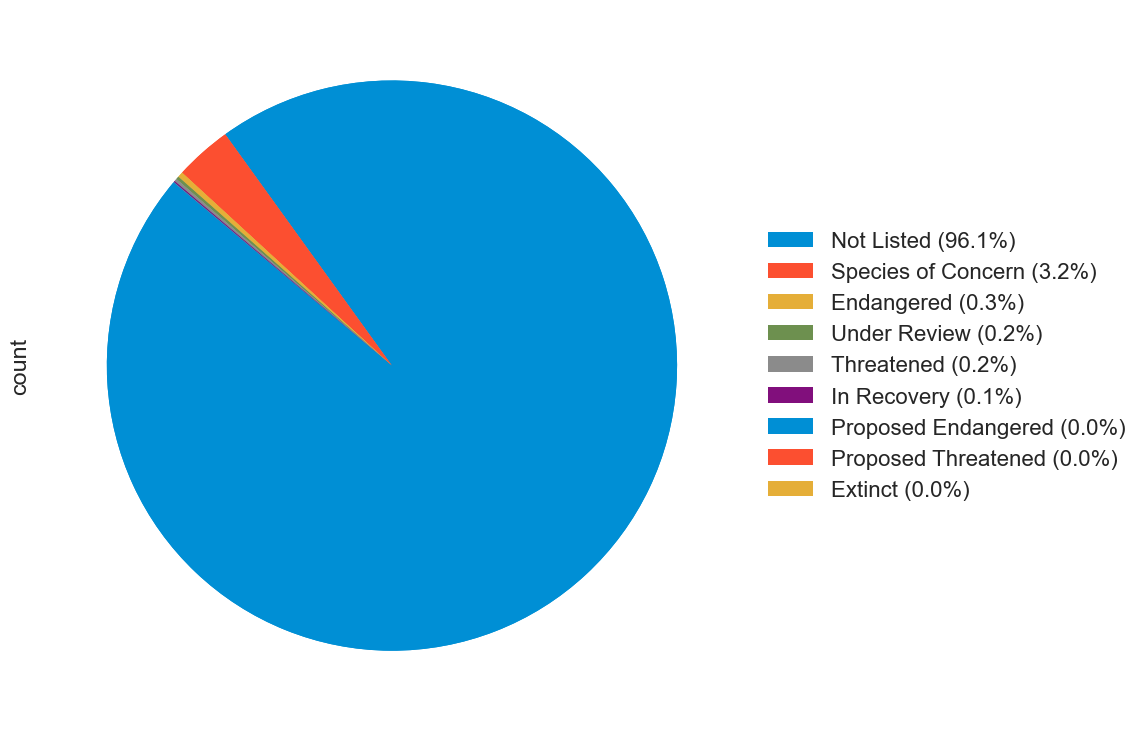

In [27]:
conservation_count.plot.pie(autopct='', startangle=140, labels=None)
labels = conservation_count.index
sizes = conservation_count.values
total = sum(sizes)
percentages = [(size / total) * 100 for size in sizes]
# Define colors for each category
#custom_colors = {'Not Listed': 'lightgrey', 'Species of Concern': 'yellow', 'Endangered': 'orange', 'Under Review': 'grey',
                  #'Threatened': 'red', 'In Recovery': 'lightgreen', 'Proposed Endangered': 'cyan', 'Proposed Threatened': 'magenta',
                    #'Extinct': 'gray'}
#colors = [custom_colors[label] for label in labels]
labels_with_percentage = [f'{label} ({percentage:.1f}%)' for label, percentage in zip(labels, percentages)]
#Plot the Piechart:

conservation_count.plot.pie(autopct='', startangle=140, labels=None)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), labels=labels_with_percentage)

The species with their conservation status are not in known limitation, either because they're not studied/known enough or because they simply aren't endangered. I decided then to remove this category to have a better view on the percentages of the species which have their conservation status descriminated:

In [11]:
conservation_corrected = conservation_count.drop('Not Listed')
conservation_corrected

Conservation Status
Species of Concern     3845
Endangered              375
Under Review            194
Threatened              186
In Recovery              77
Proposed Endangered      24
Proposed Threatened       7
Extinct                   1
Name: count, dtype: int64

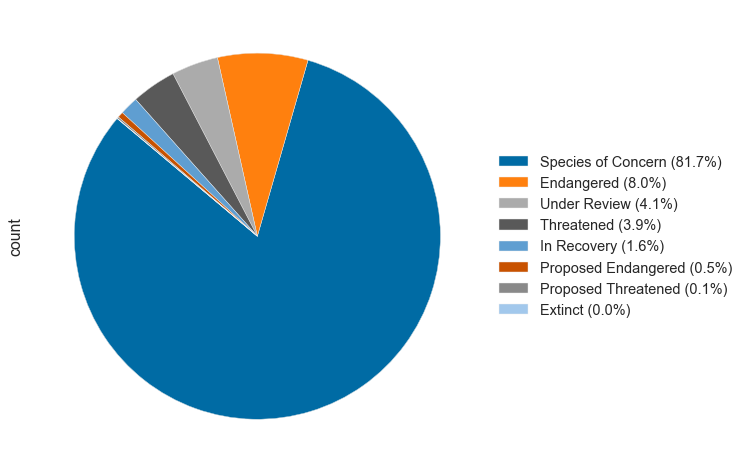

In [61]:
conservation_corrected.plot.pie(autopct='', startangle=140, labels=None)
labels = conservation_corrected.index
sizes = conservation_corrected.values
total = sum(sizes)
percentages = [(size / total) * 100 for size in sizes]
# Define colors for each category
labels_with_percentage = [f'{label} ({percentage:.1f}%)' for label, percentage in zip(labels, percentages)]
#Plot the Piechart:

conservation_corrected.plot.pie(autopct='', startangle=140, labels=None)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), labels=labels_with_percentage)